> ### EEE3314: Introduction to Artificial Intelligence

# Assignment \# I: Linear Regression

### *Assignement Instructions:*
- **Due date**: 11 PM, Sep. 24 (Fri), 2021
- **File name**: [ID_Name_HW1.ipynb]
- Write a program implementing a particular algorithm to solve a given problem.   
- **Report and discuss your results. Analyze the algorithm, theoretically and empirically.**

### *Collaboration policy:*
- You may discuss the questions with your friends, but each student writes their own codes and answers.  
- **Cheating is strictly prohibited, and will be considered academic dishonesty. This is not how you want to start your career as an engineer.**
>We expect that most students can distinguish between helping other students and cheating. Explaining the meaning of a question or discussing a way of approaching a solution is an interaction. But you should write your homework solution strictly by yourself so that your hands and eyes can help you internalize the subject matter. You should acknowledge everyone whom you have worked with, or who has given you any significant ideas about the homework
- Signiture: <span style="color:blue">[XXXXXXXXXX] [XXX]</span>

In [136]:
import datetime
# print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2021-09-22 01:25:59.191113


In [137]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Problem statement

Let's estimate a house price with 506 training samples in $\texttt{boston-house-prices.csv}$. Each sample consists of a tuple of features and a corresponding house price, where the number of features are 13.  


Detailed descriptions of features in the training dataset are as follows: 



* **CRIM**     :per capita crime rate by town
* **ZN**       :proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**    :proportion of non-retail business acres per town
* **CHAS**     :Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX**      :nitric oxides concentration (parts per 10 million)
* **RM**       :average number of rooms per dwelling
* **AGE**      :proportion of owner-occupied units built prior to 1940
* **DIS**      :weighted distances to five Boston employment centres
* **RAD**      :index of accessibility to radial highways
* **TAX**      :full-value property-tax rate per $\$$10,000
* **PTRATIO**  :pupil-teacher ratio by town
* **B**        :1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT**    :$\%$ lower status of the population


The target price value we'd like to estimate is as follows: 

* **MEDV** :Median value of owner-occupied homes in $\$$1000's

**Note #1**:
You can use ```linalg.inv```, ```transpose```, ```dot```, ```concatenate```, ```min``` and ```max``` provided by ```Numpy```. Other mehtods (e.g., ```sklearn.linear_model``` or equivalent) should not be used. You will get no credit otherwise. 

**Note #2**: We apply the min-max normalization technique for each feature in the dataset. Please ckeck the provided function (`normalize(self)`). For eaxmple, the nomrlization for the **CRIM** feature is computed as follows:


$x[i]^\prime = \frac{x[i] - min(x[:])}{max(x[:]) - min(x[:])}$

where $x[i]$ is the **CRIM** fearue in the $i$th sample in the dataset. $x[i]^\prime$ is a corresponding normalized feature.

**Why is the normalized technique helpful for regression?**

### P1. Linear regression using gradient descent

P1.1 Implement a linear regression method using **gradient descent** and estimate regression coefficients for features including a bias (intercept) term. (*50 points*) 

> **Convergence condition**: Stop the iteration if $||\hat w_t - \hat w_{t+1}||_\infty < \tau$, where $\hat w_t$  is estimated coefficients at time $t$. $t$ is a number of iteration, and $\tau (=10^{-6})$ is a tolerance. Note that the infinity norm of a vector ${\bf{x}}=(x_1,x_2,\dots,x_n)$ is defined as $||{\bf{x}}||_\infty = max(|x_1|,|x_2|,\dots,|x_n|)$.
>
> **Loss function**: Average RSS (i.e., RSS/$N$, where $N$ is a total number of samples).
>
> **Initialization**: All weight values to 0 and a bias (intercept) to 1.

P1.2 Plot an average RSS loss over the number of iterations. (*3 points*) 


P1.3 Predict the target value (`MEDV`) for a given test sample (`test_samples`). Note that 1) you first normalize each feature in the test sample using minimum and maximum values for the same feature, computed from the training dataset ($\texttt{boston-house-prices.csv}$), and then 2) denormalize the prediction in a similar manner. **Why does we apply normalization (with the values computed from the training dataset) and demormalization?** (*7 points*)


### P2. Linear regression without iterations

Implement a linear regression method without iterations (**closed-form solution**) and estimate regression coefficients for features including a bias (intercept) term. (*10 points*)

### P3. Visualize the results

Draw regression lines for individual features using estimated regression coefficients obtained from P1 and P2. (*10points*) 

## Results

In [138]:
import numpy as np

from project1 import (Dataset,
                      LinearRegressor,
                      LR_with_closed_form,
                      visualize)

### Instantiate the ```Dataset``` class

In [139]:
data_path = 'boston_house_prices.csv'
dataset = Dataset(data_path)

features = dataset.features

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


### Prepare training samples

In [140]:
X, y = dataset.parse_data(features=dataset.features)
print(f"shape of X: {X.shape}, shape of y: {y.shape}")

shape of X: (506, 14), shape of y: (506,)


In [141]:
X[3,:]

array([1.00000000e+00, 2.92795719e-04, 0.00000000e+00, 6.30498534e-02,
       0.00000000e+00, 1.50205761e-01, 6.58555279e-01, 4.41812564e-01,
       4.48544590e-01, 8.69565217e-02, 6.67938931e-02, 6.48936170e-01,
       9.94276060e-01, 3.33885210e-02])

In [142]:
dataset.max

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ,  50.    ])

### Instantiate a linear regression model

### P1.1

In [143]:
model = LinearRegressor(lr=0.1, tau=1e-6, dim=X.shape[1])

In [144]:
model.LR_with_gradient_descent(X, y)
print(model.weight)

[ 0.48168749 -0.21330442  0.10325199  0.01231712  0.05971291 -0.19217565
  0.4408397   0.0015293  -0.36118169  0.15646675 -0.14362855 -0.19917897
  0.08186172 -0.42319223]


### P1.2

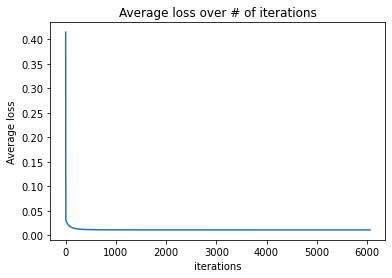

In [145]:
model.plot_loss_history()

### P1.3

In [146]:
test_samples = np.array([0.02, 80, 1.75, 0, 0.385, 6.2, 31.5, 9.1, 1, 241, 18.2, 341.6, 13])

prediction = model.calculate_house_price(test_samples, dataset.min, dataset.max)
print(f"prediction: {prediction}")

prediction: 19.93107131789193


### P2

In [147]:
weight_closed_form = LR_with_closed_form(X, y)
print(weight_closed_form)

[ 0.48045039 -0.21355017  0.10315657  0.0124631   0.0597052  -0.1918794
  0.4418597   0.00149367 -0.36059247  0.15642529 -0.14362949 -0.19901831
  0.08206283 -0.42260541]


In [148]:
print(abs(model.weight - weight_closed_form))

[1.23710281e-03 2.45750001e-04 9.54172306e-05 1.45978038e-04
 7.71771238e-06 2.96248684e-04 1.01999842e-03 3.56297051e-05
 5.89219641e-04 4.14573063e-05 9.45247863e-07 1.60657371e-04
 2.01107499e-04 5.86821117e-04]


### P3

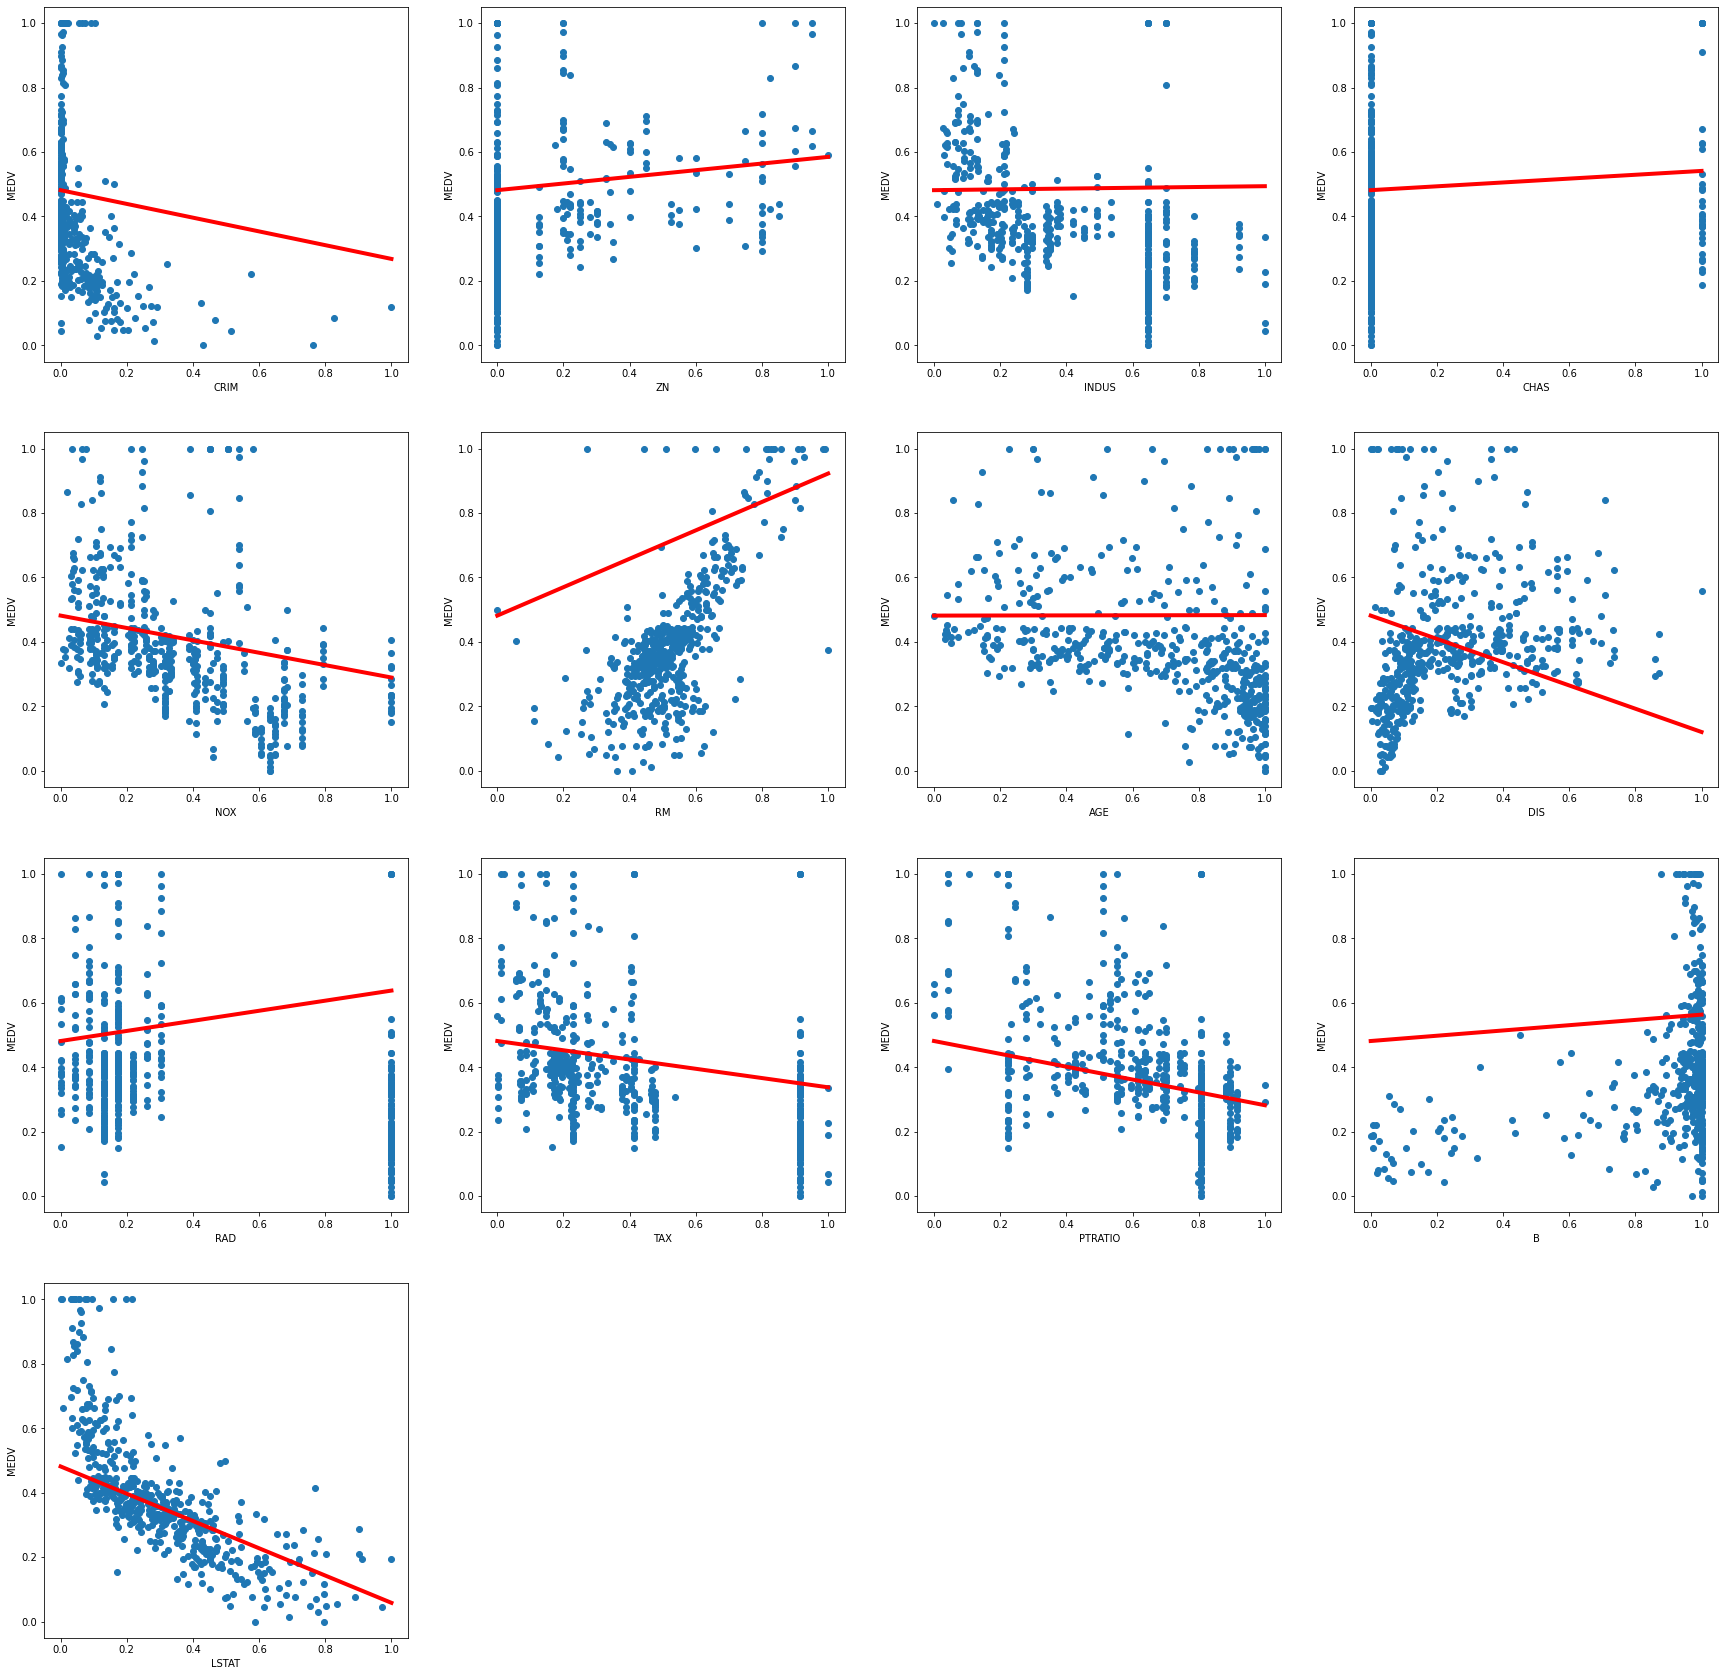

In [149]:
visualize(model.weight, X, y, features)

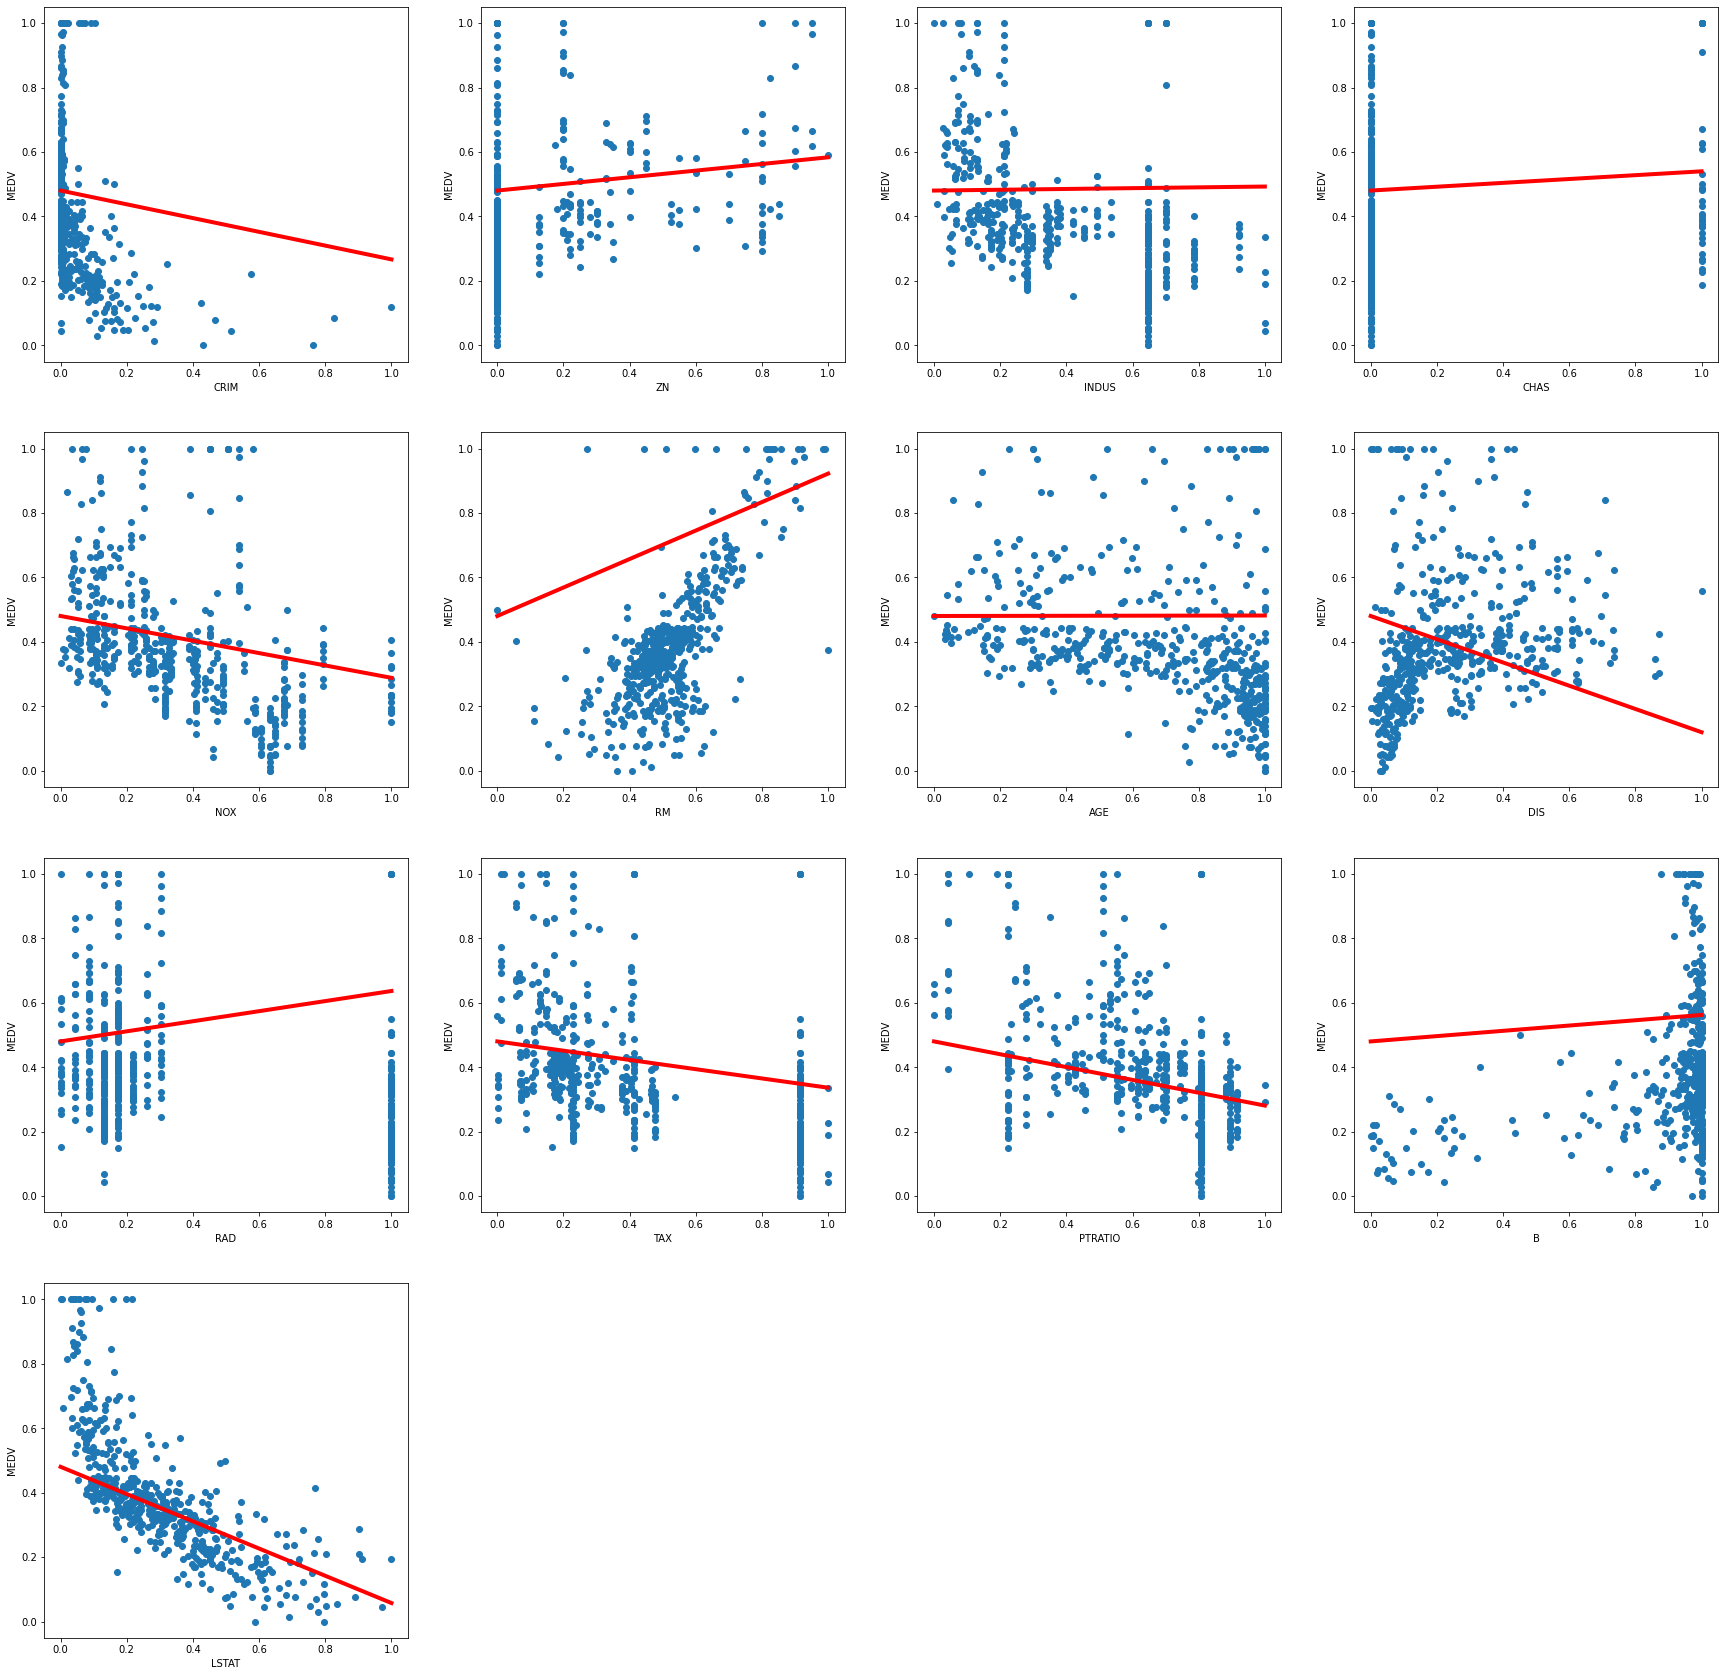

In [150]:
visualize(weight_closed_form, X, y, features)


## Analysis and discussion (20 points)

## **1.** Gradient descent solution과 closed-form solution과의 비교








Text(0.5, 1.0, 'Final average RSS vs. tau')

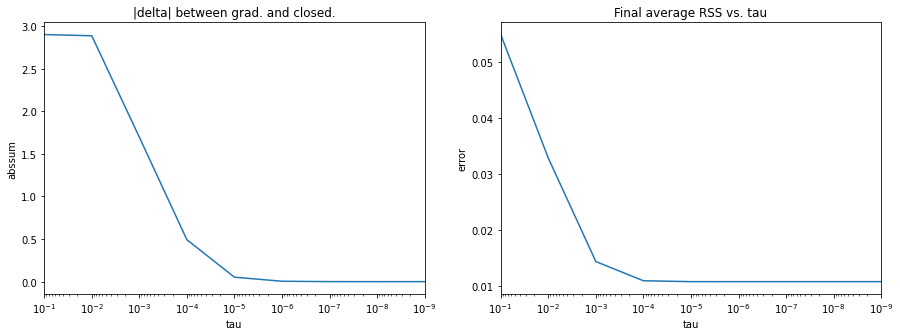

In [155]:
# 여러 tau 값에 따른 weight 값의 차이

tauarr = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]
error = []
absSum = []

for x in tauarr:
    model = LinearRegressor(lr=0.1, tau=x, dim=X.shape[1])
    model.LR_with_gradient_descent(X, y)
    absSum = np.append(absSum, np.sum(np.abs(model.weight - weight_closed_form)))
    error = np.append(error, model.loss_history[-1])

import matplotlib.pyplot as plt

mx = plt.figure(figsize=(15, 5))
ax1 = mx.add_subplot(1,2,1)
ax2 = mx.add_subplot(1,2,2)

ax1.plot(tauarr, absSum)
ax1.set_xlim(tauarr[0], tauarr[-1])
ax1.set_xscale('log')
ax1.set_xlabel('tau')
ax1.set_ylabel('abssum')
ax1.set_title('|delta| between grad. and closed.')

ax2.plot(tauarr, error)
ax2.set_xlim(tauarr[0], tauarr[-1])
ax2.set_xscale('log')
ax2.set_xlabel('tau')
ax2.set_ylabel('error')
ax2.set_title('Final average RSS vs. tau')


Closed form으로 구한 weight 값은 loss function의 slope가 0이 되는 지점을 행렬의 inverse를 이용해 찾는다.
이 weight 값을 가장 좋은 quality를 가진 참값으로 보고, gradient descent method와 여러 tau 값을 이용해 구한 weight 값을 평가하면 위와 같다.

- tau 값은 loss function의 slope가 0이 되는 지점으로부터 error를 허용할 수 있는 약간의 여백을 정해준다.

- 왼쪽 그래프는 sum(|(closed_sol)-(gradient_sol)|) 값을 tau 값에 따라 나타낸 것이다. tau 값이 작아질 수록 closed form으로 구한 weight 값과의 차이가 점점 작아지는 것을 확인할 수 있다.

- 오른쪽 그래프는 tau값에 따른 gradient descent solution의 최종 error 값(Average RSS)을 나타낸 것이다.
tau 값이 작아질 수록 error 값도 작아지면서 regression의 결과가 좋은 quality를 보이는 것을 볼 수 있다.






## **2.** Feature에 따른 regression solution

Text(0, 0.5, 'Average RSS')

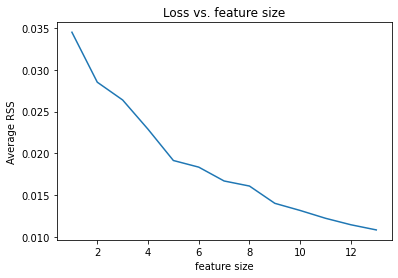

In [276]:
ftr = dataset.features
loss_history = []

for i in range(1,14):
    
    tot = 0
    for j in range(50):
        xfeatures = np.random.choice(ftr, i, replace=False)
        X, y = dataset.parse_data(xfeatures.tolist())

        closedWeight = LR_with_closed_form(X, y)
        pred = np.dot(X, closedWeight)

        loss = np.sum((pred - y)**2) / pred.shape[0]
        tot += loss

    tot = tot / 50    
    loss_history = np.append(loss_history, tot)
    
plt.plot(range(1,14), loss_history)
plt.title('Loss vs. feature size')
plt.xlabel('feature size')
plt.ylabel('Average RSS')

위 그래프는 feature size에 따른 loss의 크기를 보여준다. 각 index에 해당되는 loss는 feature array에서 무작위로 N개의 feature를 추출한 후, 그 feature들에 의해 구해지는 여러 loss 값들을 평균 내어 구해졌다.
그래프에서 보이다시피, feature size가 클수록 loss가 줄어들면서 더 좋은 regression model을 얻어내는 것을 확인할 수 있다.

Text(0, 0.5, '|weight size|')

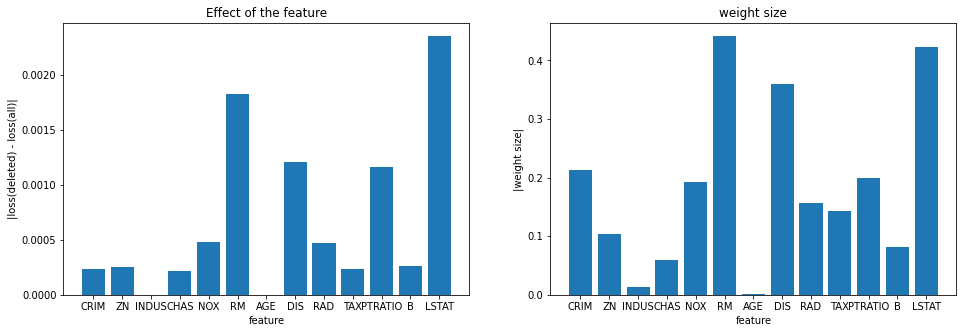

In [306]:
ftr = dataset.features
lossHistory = []

for i in range(13):
    deleted = np.delete(ftr, i)
    
    X, y = dataset.parse_data(deleted.tolist())

    closedWeight = LR_with_closed_form(X, y)
    pred = np.dot(X, closedWeight)

    loss = np.sum((pred - y)**2) / pred.shape[0]
    lossHistory = np.append(lossHistory, loss)
    

X, y = dataset.parse_data(ftr)
closedWeight = LR_with_closed_form(X, y)
pred = np.dot(X, closedWeight)
loss = np.sum((pred - y)**2) / pred.shape[0]

lossHistory = np.abs(lossHistory-loss)

mx = plt.figure(figsize=(16,5))
bx1 = mx.add_subplot(1,2,1)
bx2 = mx.add_subplot(1,2,2)

bx1.bar(ftr,lossHistory)
bx1.set_title('Effect of the feature')
bx1.set_xlabel('feature')
bx1.set_ylabel('|loss(deleted) - loss(all)|')    

tmp = np.abs(closedWeight)
bx2.bar(ftr, tmp[1:])
bx2.set_title('weight size')
bx2.set_xlabel('feature')
bx2.set_ylabel('|weight size|')    

하나의 feature을 제외하고 구한 loss와 모든 feature를 이용해 구한 loss, 이 두 loss 간의 차이를 절댓값을 통해 구해서 각 feature가 model에 주는 영향의 정도를 구했다. 위 그래프는 그 값들을 나타낸 것이다.
- 그래프에서 나타내는 값이 작을수록 해당 feature는 model에 적은 영향을 준다. 이를 통해, INDUS와 AGE feature들은 model에 영향을 주지 못하는, 집값과는 상관 없는 factor임을 알 수 있다. 또한, RM, DIS, LSTAT 등 그래프에서 큰 값을 보이는 feature들은 model에 많은 영향을 준다는 사실을 확인할 수 있다.
- weight size 측면에서도 feature들이 대부분 위와 같은 경향을 따라가는 것을 확인할 수 있다.

## 3. Normalization의 효과

- normalization을 통해 center를 0으로 설정하여 intercept의 영향을 무시할 수 있다.
- 여러 feature data의 min, max 값이 각각 같게 scaling이 되어 weight이 feature에 영향을 주는 정도를 비슷하게 설정할 수 있다. (unit 통일)